# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

## Meta Data

- Employeid: Unique ID of an Employee
- Name: Name of the employee
- Gender:  Gender of the employee
- Age: Age of an employe (in years)
- MaritalStatus: Marital Status of the Employee( Married/ Single/ Divorced etc)
- Turnover: Retention rate of an employee
- Traveling: Whether traveling is required in job role of an employee
- Vertical: In which department employee is working
- Qualifications: How many qualifications does an employee have
- Education: Qualifications are in which field (Medical/marketing/technical etc)
- Satisfaction: How much employee is satisfied in his/her role (1 minimum and 5 maximum)
- Engagement: How much engagement is required for the role (1 minimum and 5 maximum)
- Level: Level of the job( 1 being entry level and 5 means top management)
- Role: What is the employee role in the organization (Technician/Manager/HR etc)
- Daily: Daily wages of the employees
- Hour:  Hours wages of the employees
- Monthly: Monthly wages of the employee
- MonthlyRate: Total salary paid to the employee
- Work Experience: Total experience of the employee
- OverTime: Whether an employee have done overtime or not
- SalaryHike: Last salary increment in percentage
- Last Rating: Last financial year performance
- Hours: Working hours of an Employee
- TrainingTimesLastYear: Training completed by an employee in last year
- Work&Life: balance between work and life (1 minimum and 5 maximum)
- YearsAtCompany: Years employee is working with the current organization
- YearsInCurrentRole: Years employee working at current designation
- YearsSinceLastPromotion: When was last promoted
- YearsWithCurrentManager: How long employee has been working with Current manager
- DistanceFromHome: Distance between office and employee home

In [3]:
data = pd.read_csv('Ideaspice dataset with ID numbers.csv')

In [4]:
df =data.copy()

In [5]:
df.head()

,EmployeId,Name,Gender,Age,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,Education,Satisfaction,Engagement,Level,Role,Daily,Hour,Monthly,MonthlyRate,Work Experience,OverTime,SalaryHike,Last Rating,Hours,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,IDSL227,Aaliyah,F,40,Single,No,Sometimes,Sales,3,Medical,4,2,2,Sales Executive,129,97,6287,4984,1,Yes,23,4,80,1,3,13,8,4,1,2
1,IDSL030,Aaron,M,46,Married,No,No,Sales,4,Marketing,4,3,2,Sales Executive,134,64,4866,24079,9,No,18,3,80,2,3,8,7,7,7,23
2,IDRD581,Abby,F,49,Single,No,Sometimes,Research & Development,3,Medical,4,3,4,Research Director,934,82,19833,25706,5,Yes,14,3,80,2,4,7,7,0,7,13
3,IDRD633,Abel,M,29,Married,No,Sometimes,Research & Development,5,Life Sciences,4,3,3,Healthcare Representative,1201,32,7854,3642,1,No,19,3,80,3,2,10,9,1,8,13
4,IDRD122,Abigail,F,54,Married,No,Sometimes,Research & Development,3,Medical,1,1,4,Research Director,1478,42,18731,13254,2,No,13,3,80,3,3,6,2,0,1,1


### Finding null and duplicate value 

In [6]:
df.isnull().sum()

EmployeId                  0
Name                       0
Gender                     0
Age                        0
MaritalStatus              0
Turnover                   0
Travelling                 0
Vertical                   0
Qualifications             0
Education                  0
Satisfaction               0
Engagement                 0
Level                      0
Role                       0
Daily                      0
Hour                       0
Monthly                    0
MonthlyRate                0
Work Experience            0
OverTime                   0
SalaryHike                 0
Last Rating                0
Hours                      0
TrainingTimesLastYear      0
Work&Life                  0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
DistanceFromHome           0
dtype: int64

In [7]:
df.duplicated().sum()

0

### removing unnecessary columns 

In [8]:
df.drop(columns=['Name','EmployeId','Hours'], axis=1,inplace=True)

In [9]:
df.head()

,Gender,Age,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,Education,Satisfaction,Engagement,Level,Role,Daily,Hour,Monthly,MonthlyRate,Work Experience,OverTime,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,F,40,Single,No,Sometimes,Sales,3,Medical,4,2,2,Sales Executive,129,97,6287,4984,1,Yes,23,4,1,3,13,8,4,1,2
1,M,46,Married,No,No,Sales,4,Marketing,4,3,2,Sales Executive,134,64,4866,24079,9,No,18,3,2,3,8,7,7,7,23
2,F,49,Single,No,Sometimes,Research & Development,3,Medical,4,3,4,Research Director,934,82,19833,25706,5,Yes,14,3,2,4,7,7,0,7,13
3,M,29,Married,No,Sometimes,Research & Development,5,Life Sciences,4,3,3,Healthcare Representative,1201,32,7854,3642,1,No,19,3,3,2,10,9,1,8,13
4,F,54,Married,No,Sometimes,Research & Development,3,Medical,1,1,4,Research Director,1478,42,18731,13254,2,No,13,3,3,3,6,2,0,1,1


### Categorization of features into numerical, categorical and continuous

In [10]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [11]:
for feature in cat_features:
    print(f'{feature} have {df[feature].nunique()} category ----- {df[feature].unique()} ')

Gender have 2 category ----- ['F' 'M'] 
MaritalStatus have 3 category ----- ['Single' 'Married' 'Divorced'] 
Turnover have 2 category ----- ['No' 'Yes'] 
Travelling have 3 category ----- ['Sometimes' 'No' 'Mostly'] 
Vertical have 3 category ----- ['Sales' 'Research & Development' 'Human Resources'] 
Education have 6 category ----- ['Medical' 'Marketing' 'Life Sciences' 'Human Resources'
 'Technical Degree' 'Other'] 
Role have 9 category ----- ['Sales Executive' 'Research Director' 'Healthcare Representative'
 'Research Scientist' 'Human Resources' 'Manufacturing Director' 'Manager'
 'Sales Representative' 'Laboratory Technician'] 
OverTime have 2 category ----- ['Yes' 'No'] 


In [12]:
for feature in num_features:
    print(f'{feature} have {df[feature].nunique()} category ----- {df[feature].unique()} ')

Age have 42 category ----- [40 46 49 29 54 33 35 25 27 32 41 31 36 51 42 30 34 44 22 39 50 56 38 48
 45 37 21 24 18 23 26 55 28 52 47 43 19 57 59 58 20 53] 
Qualifications have 5 category ----- [3 4 5 1 2] 
Satisfaction have 4 category ----- [4 1 3 2] 
Engagement have 4 category ----- [2 3 1 4] 
Level have 5 category ----- [2 4 3 5 1] 
Daily have 889 category ----- [ 129  134  934 1201 1478 1169 1378  541 1112  156  755 1299  558  791
  890  141  468 1032  842 1003 1225  978 1055  453  535 1252  122  207
  261 1490 1327 1315  142  637  230  794  503  403  688  533  111  693
  618  927  167 1287  907  109  880  653  452  600  510  231  697 1151
  320  115  382  440 1495  295  505  743  557 1198 1341  457  185 1255
  418  812 1328  276  609  518 1227 1269  826 1436 1049 1318  212  464
 1257  720  480 1078 1144  195  526  189  317 1278 1186 1131  945  939
  990  547  852 1036  664 1455  120  436  377 1271 1085 1374 1426  841
  633 1290  406  671  294  969  555  980  506 1019 1397  172 107

In [13]:
cont_features = []
num_cat_features =[]
for feature in num_features:
    if df[feature].nunique() > 7 :
        cont_features.append(feature)
    else:
        num_cat_features.append(feature)
print(cont_features)


['Age', 'Daily', 'Hour', 'Monthly', 'MonthlyRate', 'Work Experience', 'SalaryHike', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrentManager', 'DistanceFromHome']


### finding outlires with IQR

In [14]:


def iqr_outliers_(df):
    outliers = []
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    for i, value in enumerate(df):
        if value > upper_tail or value < lower_tail:
            outliers.append(i)
    print("Outlier Indices:", outliers)
    return(outliers)

In [15]:
#### to replace outliers using iqr

def iqr_outliers(df):
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df)
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            df = df.replace(i, med)


In [16]:
df.iloc[iqr_outliers_(df['Monthly'])]

Outlier Indices: [2, 4, 16, 17, 20, 31, 45, 55, 66, 78, 92, 125, 135, 172, 181, 217, 219, 224, 225, 231, 256, 258, 278, 290, 300, 304, 327, 341, 345, 355, 376, 381, 386, 413, 463, 478, 484, 486, 521, 525, 534, 541, 542, 553, 588, 622, 625, 634, 645, 669, 678, 679, 682, 683, 715, 729, 731, 735, 759, 807, 811, 823, 853, 864, 871, 882, 883, 898, 901, 905, 908, 942, 953, 964, 971, 976, 1019, 1025, 1072, 1076, 1089, 1095, 1097, 1102, 1103, 1115, 1161, 1174, 1202, 1217, 1256, 1259, 1275, 1276, 1297, 1344, 1356, 1360, 1368, 1371, 1372, 1391, 1394, 1404, 1409, 1414, 1422, 1424, 1446, 1452, 1455, 1464]


,Gender,Age,MaritalStatus,Turnover,Travelling,Vertical,Qualifications,Education,Satisfaction,Engagement,Level,Role,Daily,Hour,Monthly,MonthlyRate,Work Experience,OverTime,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
2,F,49,Single,No,Sometimes,Research & Development,3,Medical,4,3,4,Research Director,934,82,19833,25706,5,Yes,14,3,2,4,7,7,0,7,13
4,F,54,Married,No,Sometimes,Research & Development,3,Medical,1,1,4,Research Director,1478,42,18731,13254,2,No,13,3,3,3,6,2,0,1,1
16,F,51,Single,No,Sometimes,Research & Development,3,Life Sciences,1,3,4,Research Director,468,98,19450,22562,1,No,14,3,2,2,14,15,15,16,10
17,M,42,Divorced,No,No,Research & Development,4,Technical Degree,4,3,5,Manager,1032,85,18708,4051,4,No,13,3,2,3,2,1,2,2,21
20,F,40,Divorced,No,Sometimes,Research & Development,3,Medical,2,3,2,Healthcare Representative,1225,69,18534,12313,2,No,14,3,4,1,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,F,31,Single,No,No,Research & Development,4,Life Sciences,4,3,3,Research Director,561,73,19403,23722,5,No,12,3,2,3,2,2,2,2,21
1446,M,42,Divorced,No,Sometimes,Sales,4,Marketing,1,4,4,Manager,298,79,17747,18462,4,No,11,3,3,3,30,6,0,6,1
1452,F,44,Married,No,Sometimes,Sales,4,Life Sciences,3,4,4,Manager,1469,95,19235,15592,4,No,12,3,3,3,7,7,3,7,1
1455,M,34,Married,No,Sometimes,Sales,4,Life Sciences,4,3,3,Sales Executive,214,82,18059,16826,4,No,11,3,2,3,11,8,0,7,8


## Univariate analysis 


Gender
F    817
M    653
Name: Gender, dtype: int64


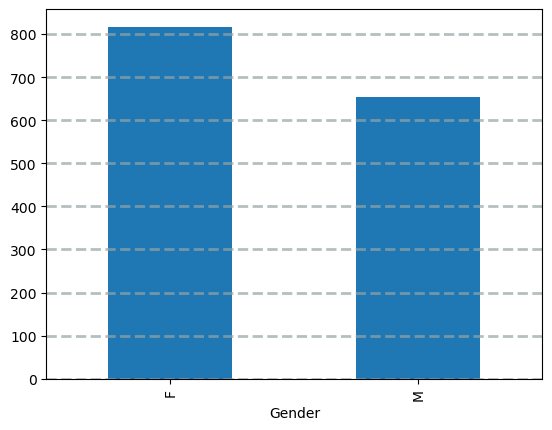

MaritalStatus
Divorced    349
Married     659
Single      462
Name: MaritalStatus, dtype: int64


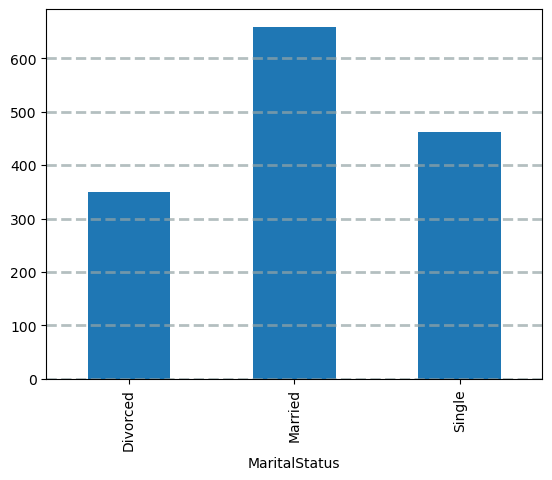

Turnover
No     1203
Yes     267
Name: Turnover, dtype: int64


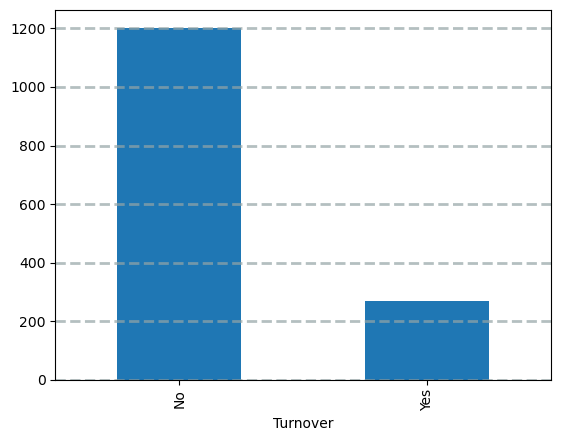

Travelling
Mostly       304
No           167
Sometimes    999
Name: Travelling, dtype: int64


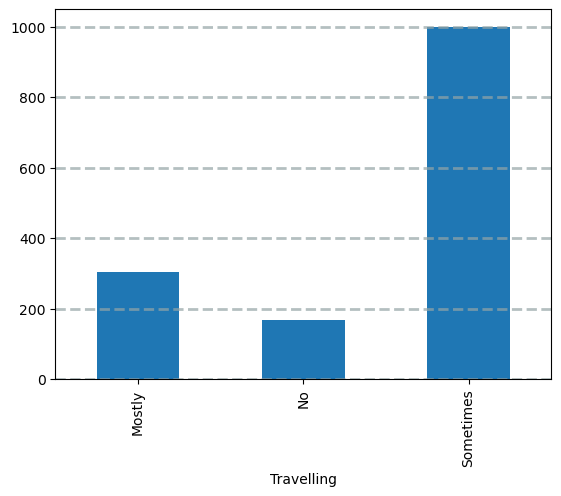

Vertical
Human Resources            64
Research & Development    965
Sales                     441
Name: Vertical, dtype: int64


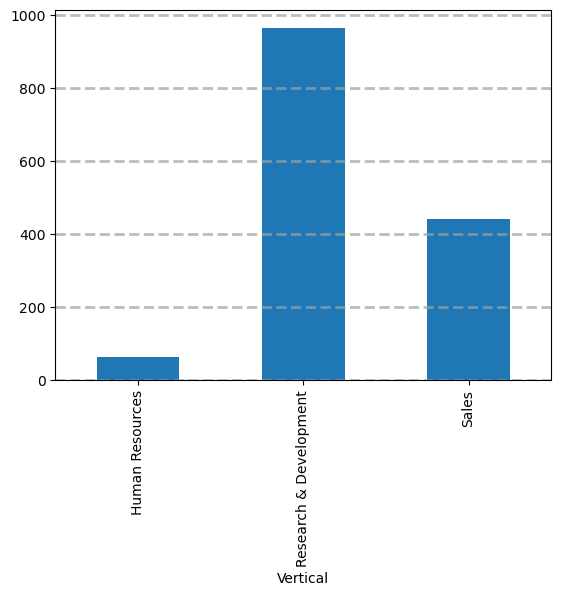

Education
Human Resources      23
Life Sciences       603
Marketing           158
Medical             465
Other                95
Technical Degree    126
Name: Education, dtype: int64


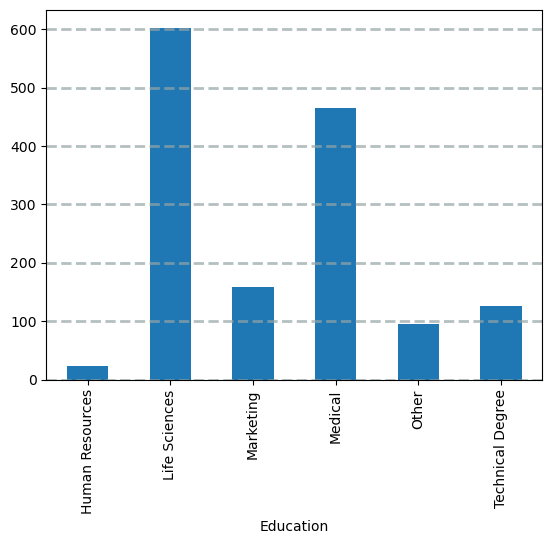

Role
Healthcare Representative    149
Human Resources               30
Laboratory Technician        276
Manager                       99
Manufacturing Director       149
Research Director             96
Research Scientist           262
Sales Executive              323
Sales Representative          86
Name: Role, dtype: int64


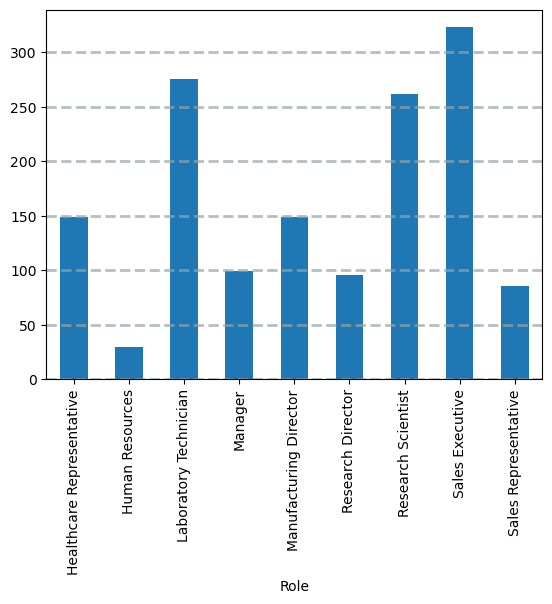

OverTime
No     1069
Yes     401
Name: OverTime, dtype: int64


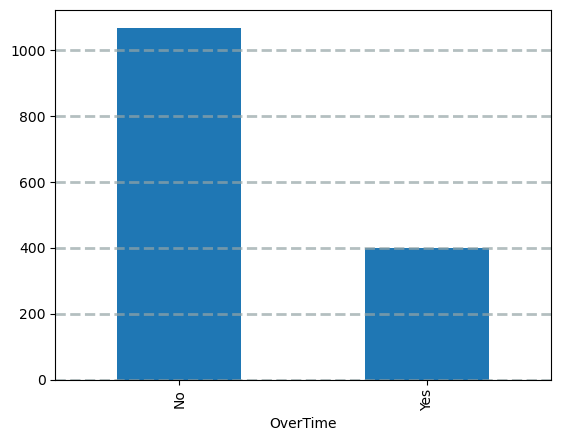

In [17]:
### categorical veriables 
for feature in cat_features:
    df.groupby(feature)[feature].count().plot.bar()
    print(df.groupby(feature)[feature].count())
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.show()

Qualifications
1    180
2    284
3    585
4    380
5     41
Name: Qualifications, dtype: int64


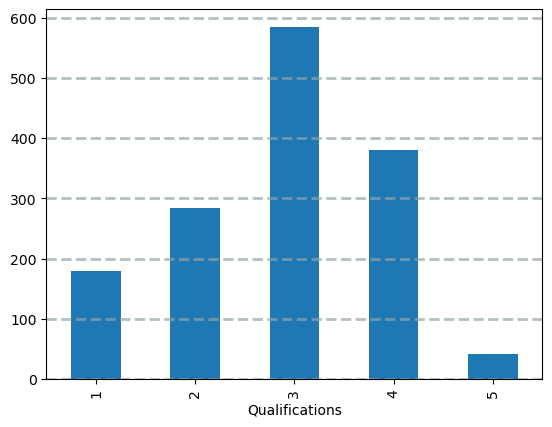

Satisfaction
1    300
2    265
3    478
4    427
Name: Satisfaction, dtype: int64


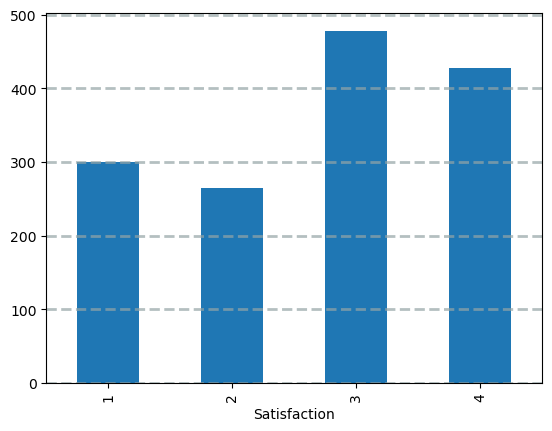

Engagement
1     96
2    377
3    851
4    146
Name: Engagement, dtype: int64


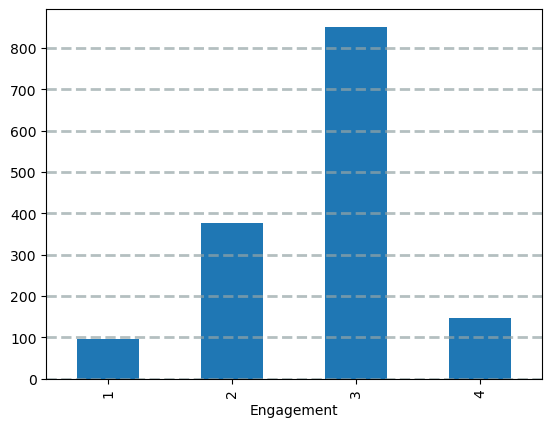

Level
1    538
2    511
3    239
4    119
5     63
Name: Level, dtype: int64


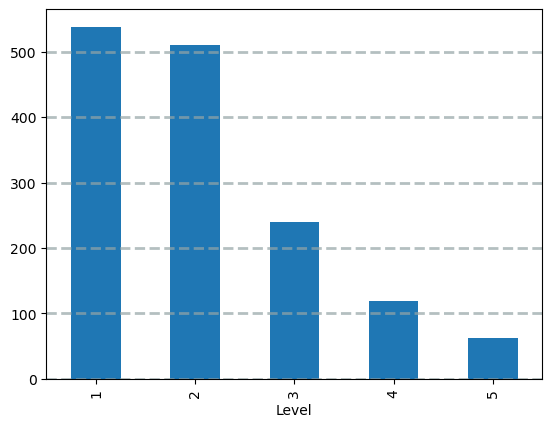

Last Rating
3    1231
4     239
Name: Last Rating, dtype: int64


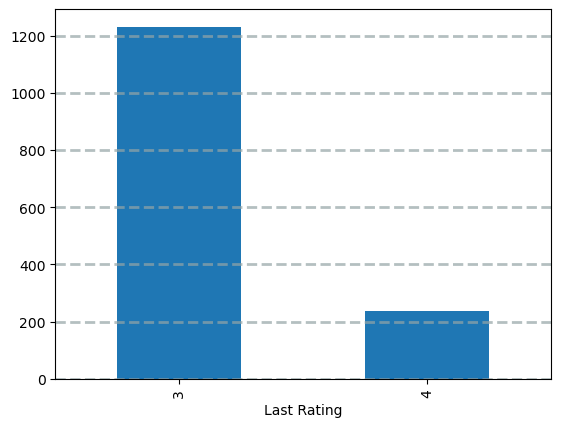

TrainingTimesLastYear
0     61
1     72
2    610
3    409
4    115
5    126
6     77
Name: TrainingTimesLastYear, dtype: int64


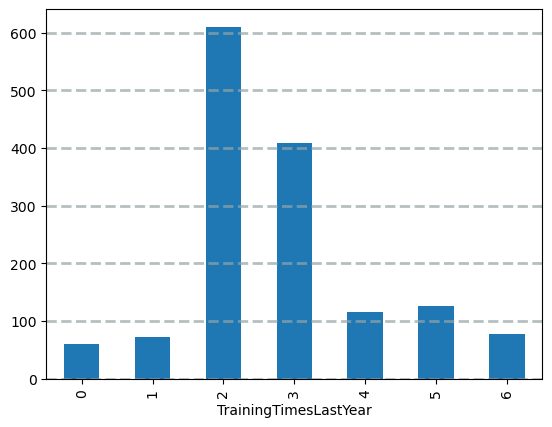

Work&Life
1     78
2    319
3    894
4    179
Name: Work&Life, dtype: int64


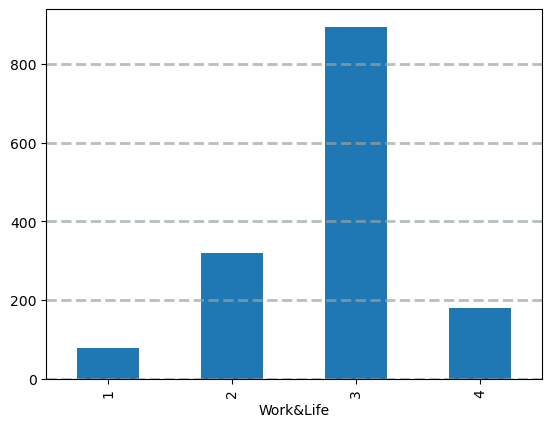

In [18]:
for feature in num_cat_features:
    df.groupby(feature)[feature].count().plot.bar()
    print(df.groupby(feature)[feature].count())
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.show()


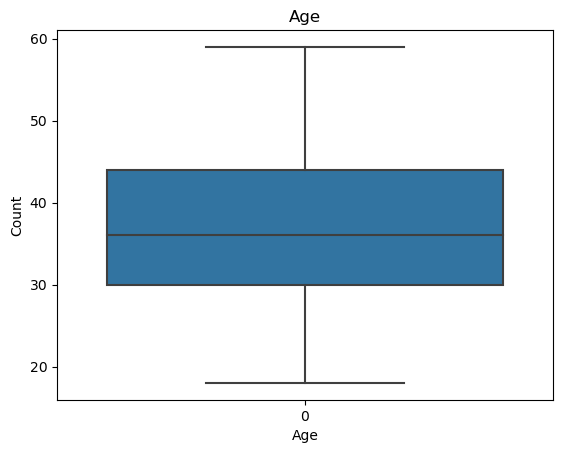

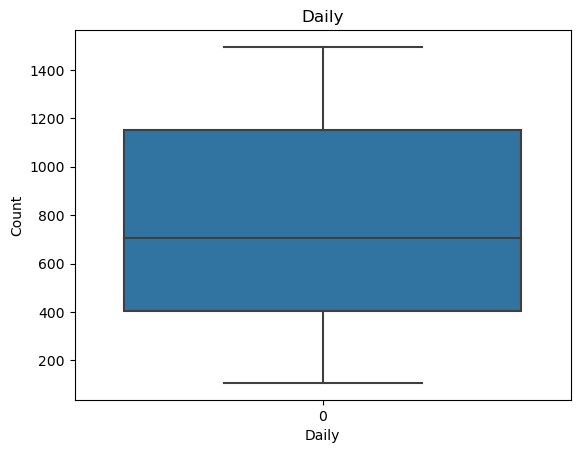

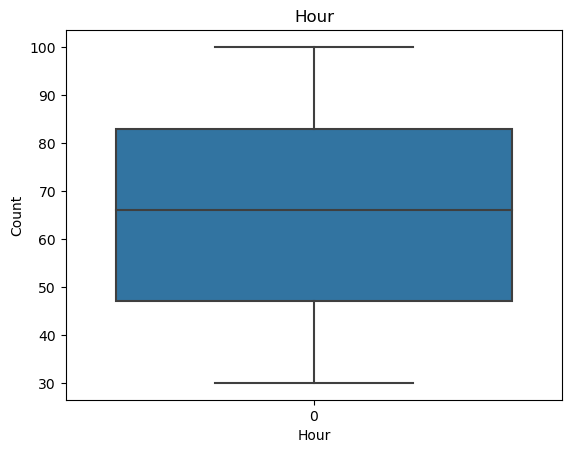

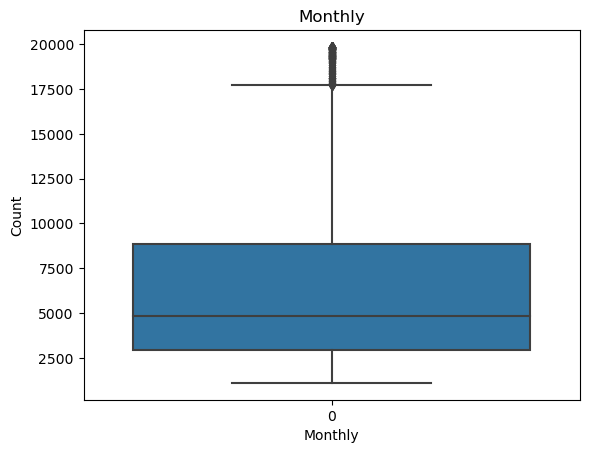

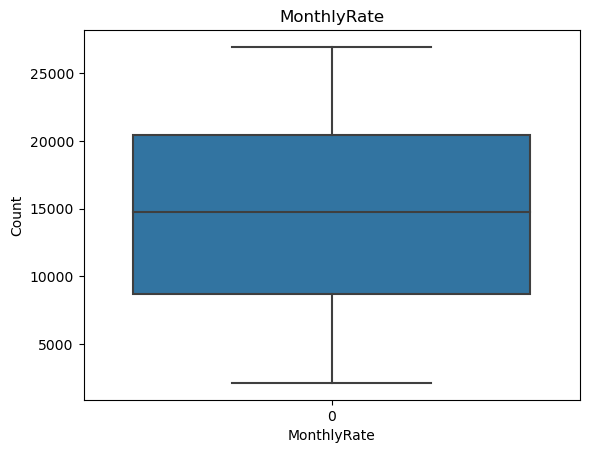

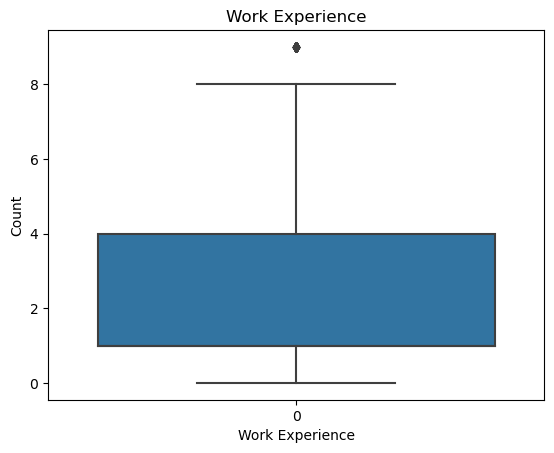

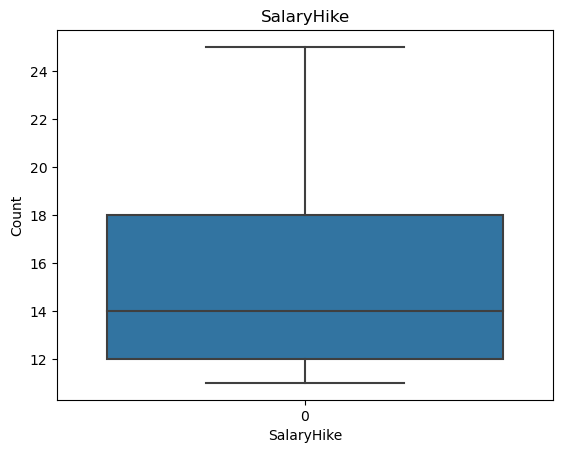

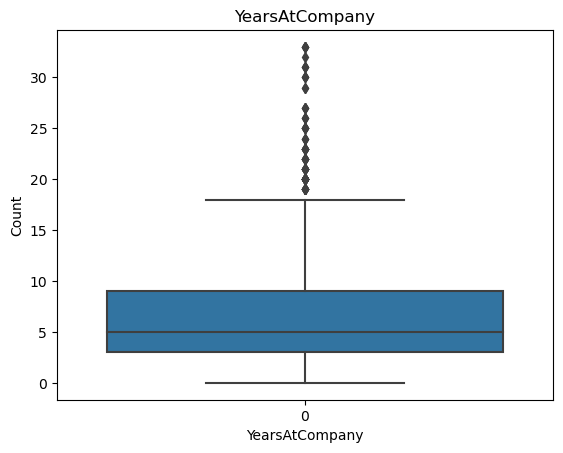

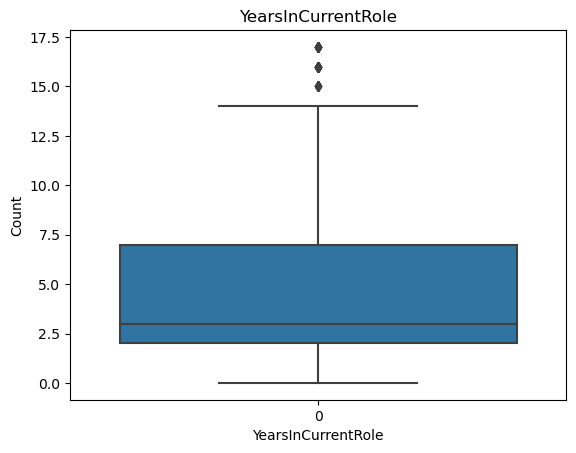

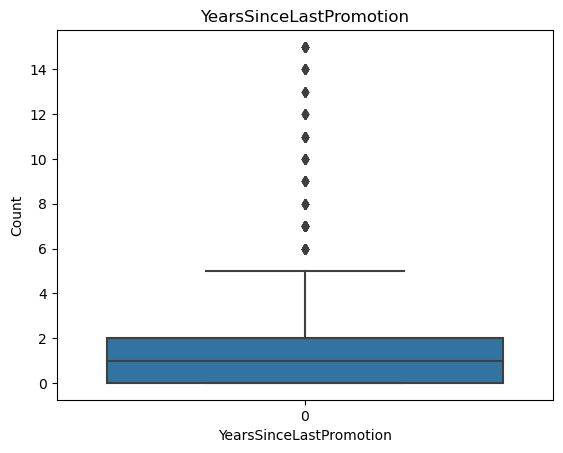

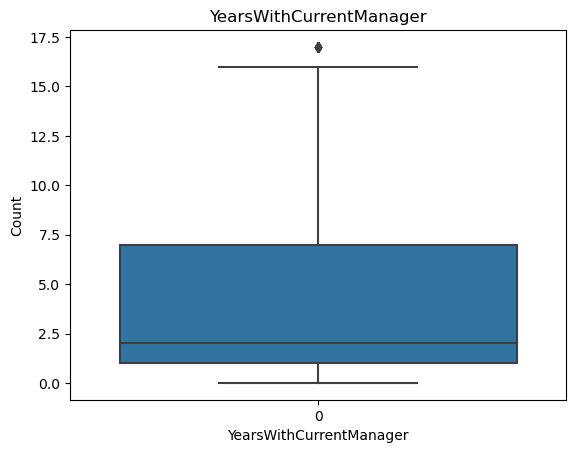

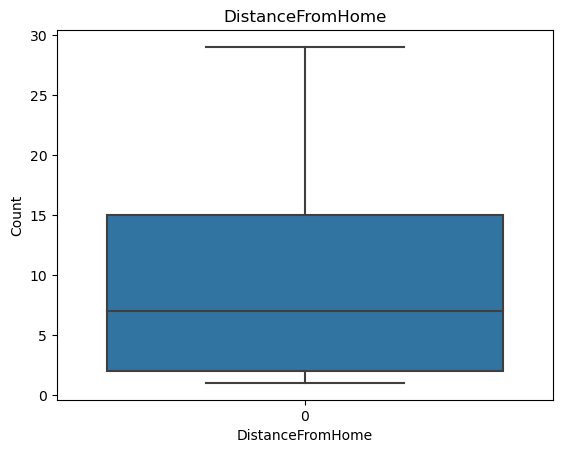

In [19]:
for feature in cont_features:
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Bivariate analysis

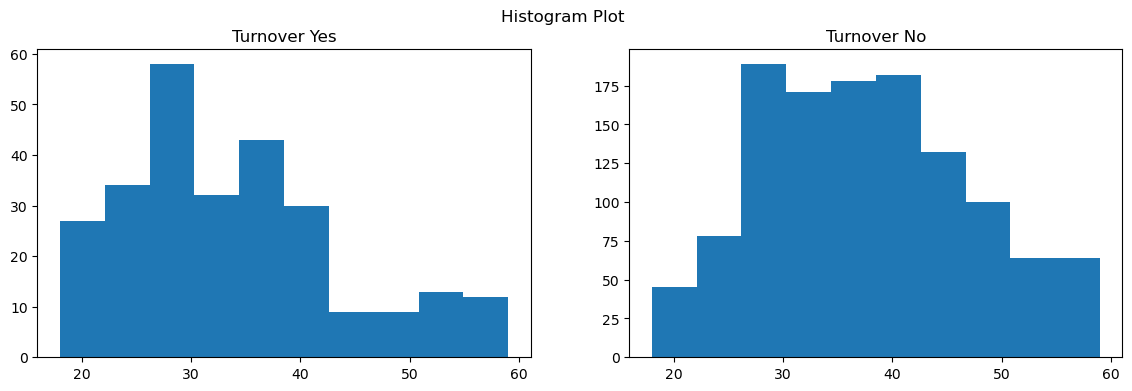

In [20]:

age1 = df.loc[df['Turnover'] == 'Yes', 'Age']
age2 = df.loc[df['Turnover'] == 'No','Age']

fig, axs = plt.subplots(1,2, figsize = (14,4))
fig.suptitle('Histogram Plot')
axs[0].hist(age1)
axs[0].title.set_text('Turnover Yes')
axs[1].hist(age2)
axs[1].title.set_text('Turnover No')

analysis - Turnover rate start decreasing after 30 years 

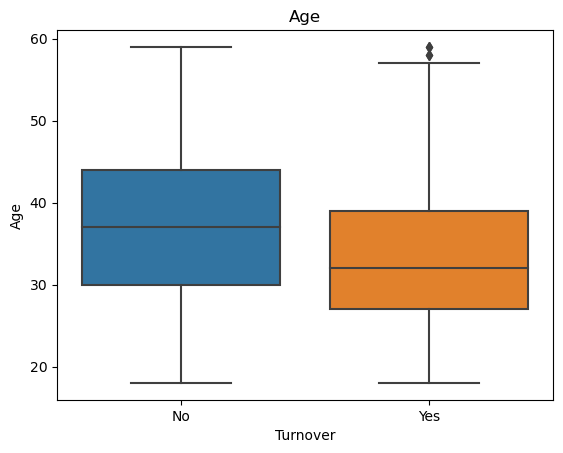

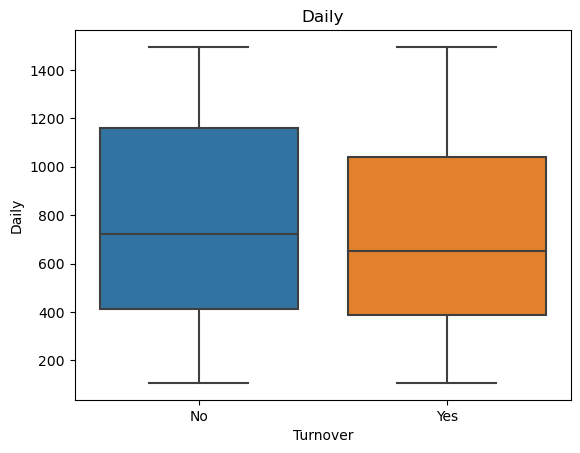

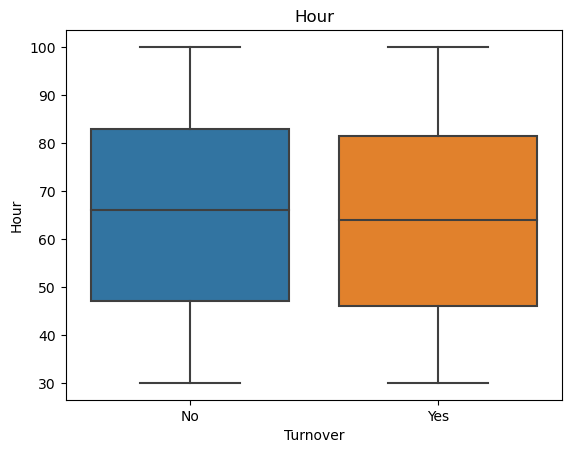

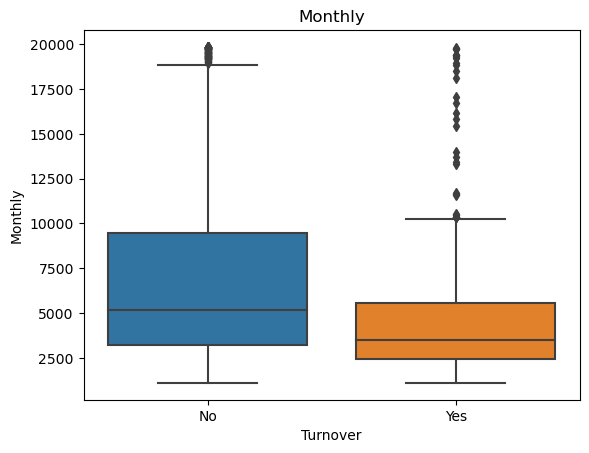

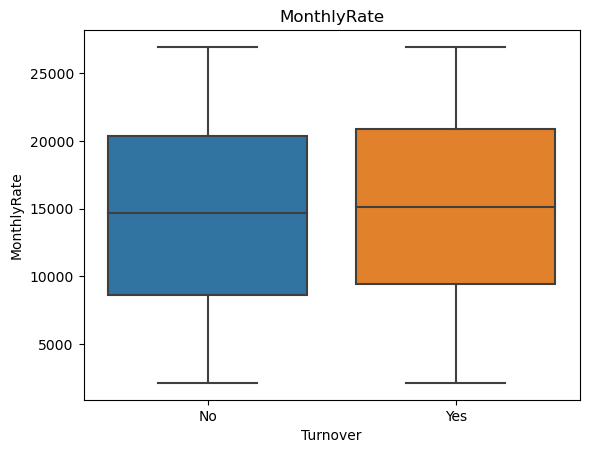

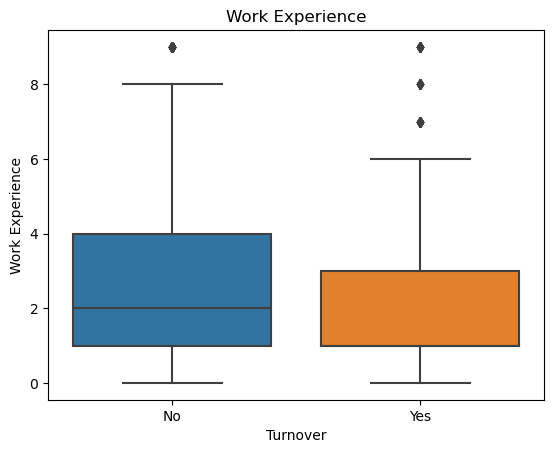

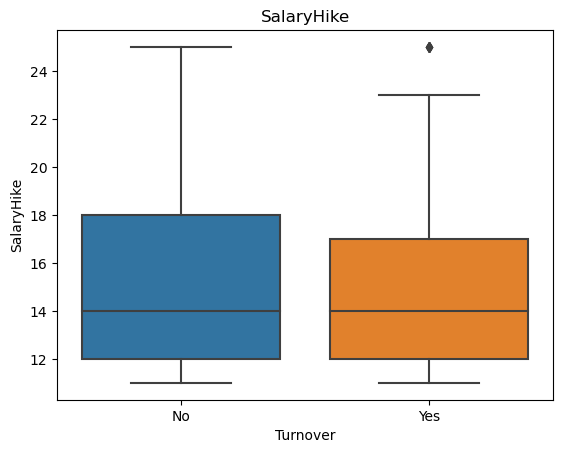

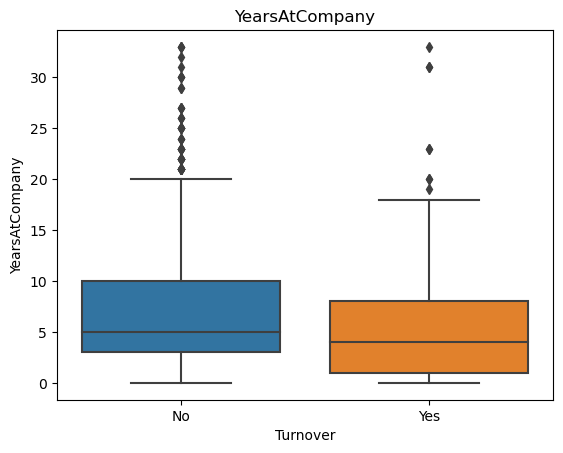

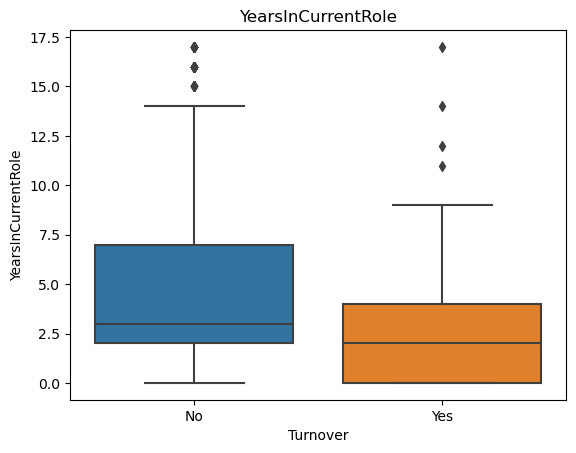

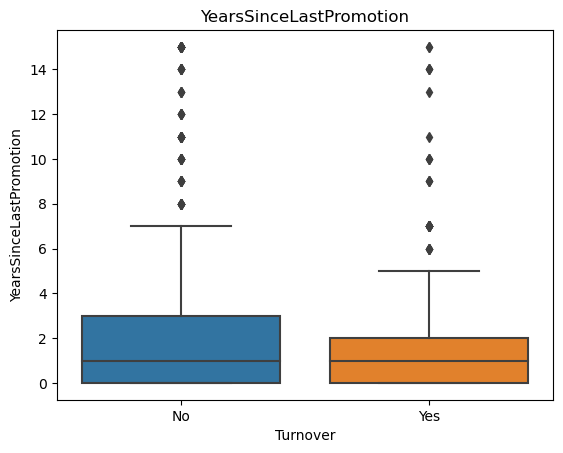

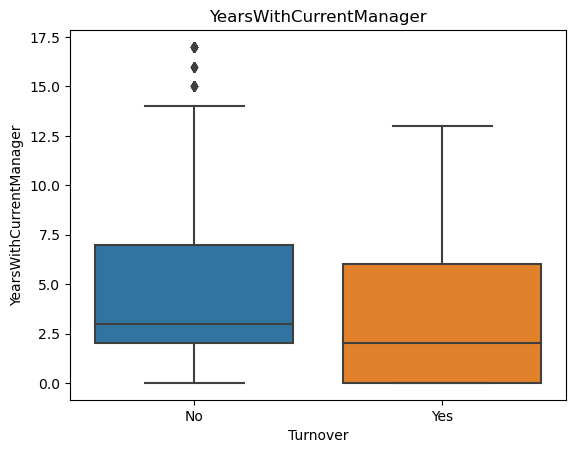

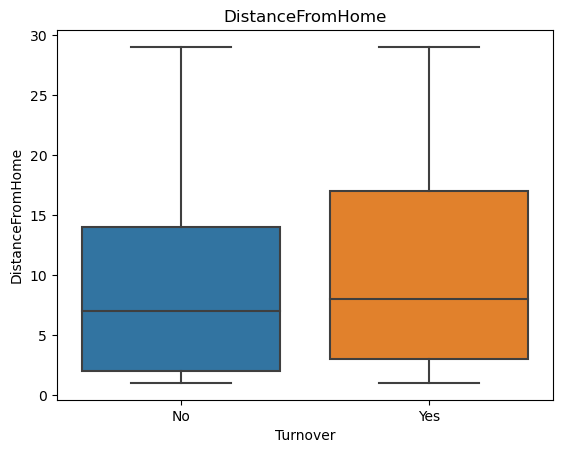

In [21]:
for feature in cont_features:
    sns.boxplot(df,x=df['Turnover'],y=feature)
    plt.title(feature)
    plt.show()
